The goal of this project is to build a multilayer perceptron multiclass classifier from scratch using only numpy. The neural net that I created is a proof of concept and a display of my understanding of how MLPs work at the low level. 

Here is a quick layout of the notebook:

- I first take the dataset from the [Digit Recognizer Kaggle challenge](https://www.kaggle.com/competitions/digit-recognizer) and use the neural network I created to make a submission and get an evaluation
- Then I create a network of the same architecture and API using PyTorch
- After that I compare the results and discuss the shortcomings of my numpy neural net

This notebook uses my networks as modules, the source code for which can be found in the corresponding folders. 

# Part 1 - numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from my_numpy_nn.mlp_classifier import MLPClassifier

Here is the description of the MLPClassifier and its init parameters

In [2]:
print(MLPClassifier.__doc__)
print(MLPClassifier.__init__.__doc__)


    MLP multiclass classifier with an arbitrary number
     of fully connected linear layers and softmax cross-entropy loss function
    

        Arguments:
            input_size: (int): size of 1 instance of data (X)
            
            output_size: (int): size of the prediction vector
            
            n_layers: (int): number of layers in the network
            
            layer_dims: list[int]: dimensions of hidden layers,
            (len(layer_dims) = n_layers - 1)
        


Import the data

In [3]:
digits = pd.read_csv('train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Detach labels and normalize X

In [4]:
y_train = digits['label']
X_train = digits.drop(['label'], axis=1) / 255 

Print the first 5 images with their labels

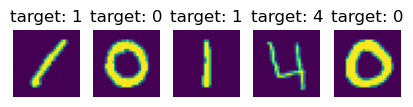

In [5]:
n_samples = 5
f, ax  = plt.subplots(1,n_samples, figsize=(n_samples, 5))

for i in range(n_samples):
    ax[i].imshow(X_train.loc[i, :].values.reshape(28,28))
    ax[i].axis('off')
    ax[i].set_title('target: '+str(y_train[i]))

Set hyperparameteres

In [6]:
input_size = X_train.shape[1]
output_size = len(set(y_train))
layer_dims = [100, 350, 500]
n_layers = len(layer_dims) + 1
n_epochs = 20
learning_rate = 1e-3

Create a classifier and train it, measure accuracy on the same data

In [7]:
mlp = MLPClassifier(input_size=input_size, output_size=output_size, 
                    n_layers=n_layers, layer_dims=layer_dims)
mlp.fit(X_train.values, y_train, n_epochs=n_epochs, 
        learning_rate=learning_rate)

Epoch: 1/20	loss: 0.327	 balanced accuracy on train: 0.899
Epoch: 2/20	loss: 0.153	 balanced accuracy on train: 0.954
Epoch: 3/20	loss: 0.108	 balanced accuracy on train: 0.967
Epoch: 4/20	loss: 0.083	 balanced accuracy on train: 0.976
Epoch: 5/20	loss: 0.065	 balanced accuracy on train: 0.981
Epoch: 6/20	loss: 0.052	 balanced accuracy on train: 0.986
Epoch: 7/20	loss: 0.042	 balanced accuracy on train: 0.989
Epoch: 8/20	loss: 0.034	 balanced accuracy on train: 0.992
Epoch: 9/20	loss: 0.027	 balanced accuracy on train: 0.994
Epoch: 10/20	loss: 0.022	 balanced accuracy on train: 0.996
Epoch: 11/20	loss: 0.017	 balanced accuracy on train: 0.997
Epoch: 12/20	loss: 0.014	 balanced accuracy on train: 0.998
Epoch: 13/20	loss: 0.011	 balanced accuracy on train: 0.999
Epoch: 14/20	loss: 0.009	 balanced accuracy on train: 0.999
Epoch: 15/20	loss: 0.007	 balanced accuracy on train: 1.000
Epoch: 16/20	loss: 0.006	 balanced accuracy on train: 1.000
Epoch: 17/20	loss: 0.005	 balanced accuracy on tr

Plot metrics

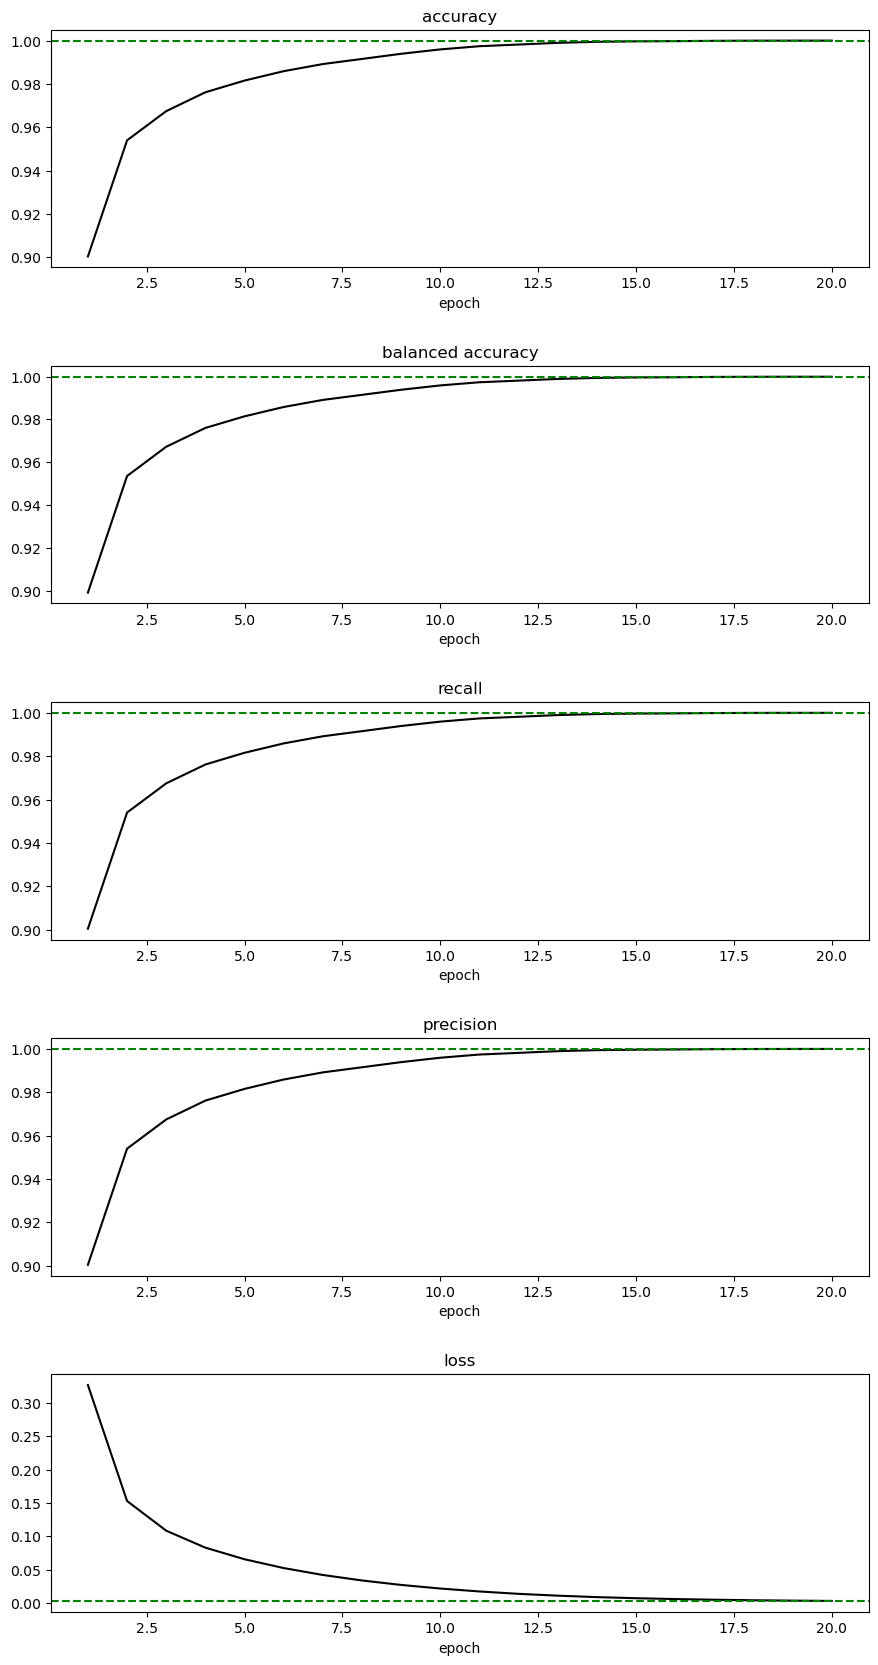

In [8]:
from utils.plot_metrics import PlotMetrics
PlotMetrics(mlp).plot()

Make and save a prediction on the test data

In [9]:
X_test = pd.read_csv('test.csv')
y_pred = mlp.predict(X_test.values)
y_pred = pd.DataFrame(y_pred, columns= ['Label'])
y_pred.index += 1
y_pred['Label'].to_csv('submission.csv', index_label='ImageId')

Resulting accuracy on contest data: 0.97132

<img src="results/submission1.png"/>

# Part 2 - PyTorch

In [10]:
import torch
from torch.utils.data import DataLoader

from my_torch_nn.mlp_classifier import MLPClassifierTorch
from my_torch_nn.numbers_dataset import NumbersDataset

Create a torch Dataset from train data

In [11]:
train_data = NumbersDataset('train.csv')
train_loader = DataLoader(dataset=train_data, batch_size=64, shuffle=True, num_workers=2)

Initialize a classifier and train it

In [12]:
mlp_torch = MLPClassifierTorch(input_size=input_size, output_size=output_size, 
                    n_layers=n_layers, layer_dims=layer_dims)
mlp_torch.fit(train_loader, learning_rate=learning_rate, n_epochs=n_epochs)

Epoch: 1/20	loss: 0.310	 balanced accuracy on train: 0.959
Epoch: 2/20	loss: 0.151	 balanced accuracy on train: 0.960
Epoch: 3/20	loss: 0.120	 balanced accuracy on train: 0.974
Epoch: 4/20	loss: 0.106	 balanced accuracy on train: 0.979
Epoch: 5/20	loss: 0.095	 balanced accuracy on train: 0.978
Epoch: 6/20	loss: 0.087	 balanced accuracy on train: 0.980
Epoch: 7/20	loss: 0.085	 balanced accuracy on train: 0.971
Epoch: 8/20	loss: 0.077	 balanced accuracy on train: 0.986
Epoch: 9/20	loss: 0.070	 balanced accuracy on train: 0.984
Epoch: 10/20	loss: 0.065	 balanced accuracy on train: 0.986
Epoch: 11/20	loss: 0.061	 balanced accuracy on train: 0.987
Epoch: 12/20	loss: 0.066	 balanced accuracy on train: 0.989
Epoch: 13/20	loss: 0.061	 balanced accuracy on train: 0.990
Epoch: 14/20	loss: 0.054	 balanced accuracy on train: 0.990
Epoch: 15/20	loss: 0.056	 balanced accuracy on train: 0.990
Epoch: 16/20	loss: 0.050	 balanced accuracy on train: 0.987
Epoch: 17/20	loss: 0.047	 balanced accuracy on tr

Plot metrics

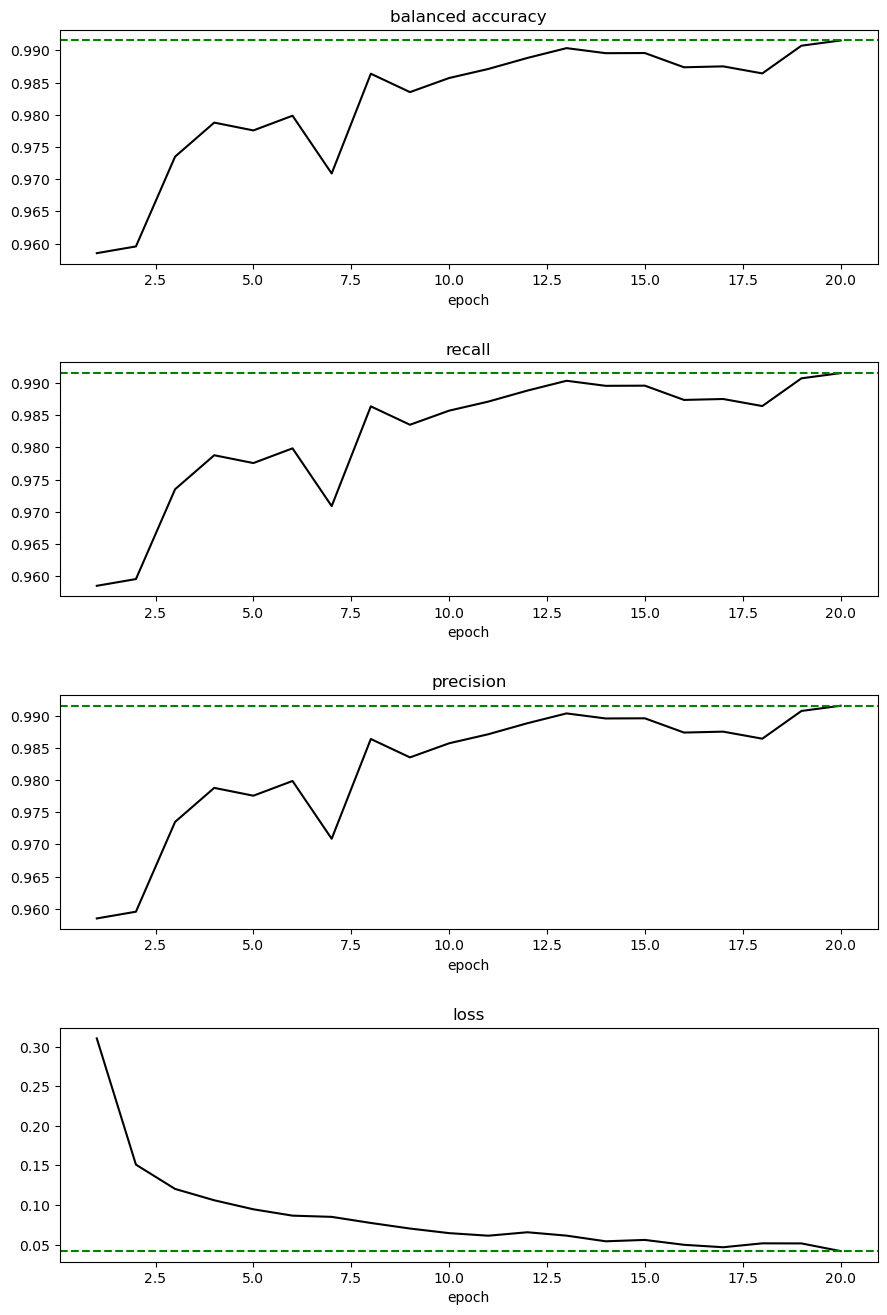

In [13]:
PlotMetrics(mlp_torch).plot()

Make and save a prediction on the test data

In [14]:
X_test = pd.read_csv('test.csv')
y_pred = mlp_torch.predict(torch.tensor(X_test.values, dtype=torch.float32))
y_pred = pd.DataFrame(y_pred, columns= ['Label'])
y_pred.index += 1
y_pred['Label'].to_csv('submission2.csv', index_label='ImageId')

Resulting accuracy on contest data: 0.96671

<img src="results/submission2.png"/>

# Part 3 - discussion

Both models performed very similarly, however, the numpy neural net has 2 major issues:
1. Some choices of layer dimensions may lead to overflow in the activation function during forward pass and oppositely vanishing gradients during backpropagation
2. All computations take place on the CPU which makes the training process really slow

It is my understanding that the core of the first problem lies in poor initialization of weights and biases for the layers. I am using samples from the [standard normal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) of mean 0 and variance 1 further modified by dividing by 10. Instead of dividing by 10 I could make use of Xavier and He initializers as described [here](https://github.com/christianversloot/machine-learning-articles/blob/main/he-xavier-initialization-activation-functions-choose-wisely.md).

To solve the second problem I could use libraries like gnumpy or CuPy which would help accelerate the computations.

Implementing these things would majorly improve training time and robustness of the network, but at this point I am satisfied with what I have achieved and have decided to move on to other projects. 